# Principal Component Analysis (PCA)

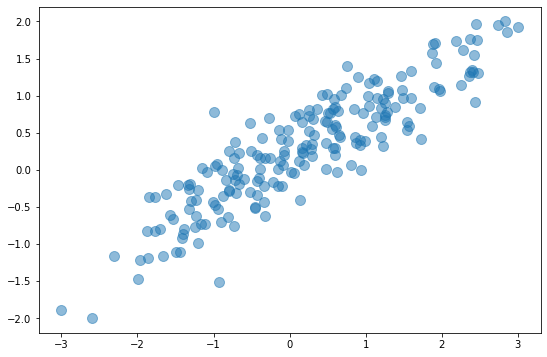

In [9]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
%matplotlib inline

x, y = make_regression(n_samples=200, n_features=1, noise=50, random_state=0)
x = np.interp(x, (x.min(), x.max()), (-3, 3))
y = np.interp(y, (y.min(), y.max()), (-2, 2))
xy = np.column_stack((x, y))

plt.figure(figsize=(9, 6))
plt.scatter(x, y, s=100, alpha=0.5)

In [13]:
#Use PCA to find 2 Principal Components
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(xy)

PCA(n_components=2)

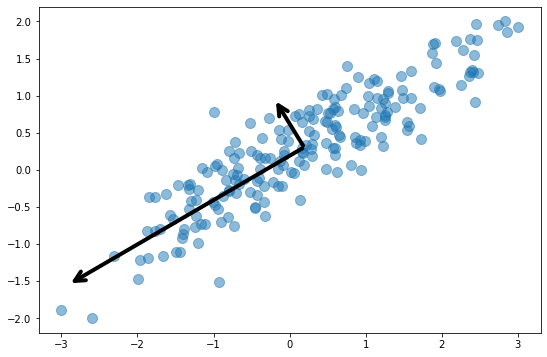

In [14]:
#Plot the PCs
def draw_vector(v0, v1):
    ax = plt.gca()
    props = dict(arrowstyle='->', linewidth=4, mutation_scale=25)
    ax.annotate('', v1, v0, arrowprops=props)
    
plt.figure(figsize=(9, 6))
plt.scatter(x, y, s=100, alpha=0.5)

for len, vector in zip(pca.explained_variance_, pca.components_):
    draw_vector(pca.mean_, pca.mean_ + (vector * 2.5 * np.sqrt(len)))

In [15]:
pca.explained_variance_ratio_

array([0.95860561, 0.04139439])

In [16]:
pca = PCA(n_components=1)
pca_data = pca.fit_transform(xy)

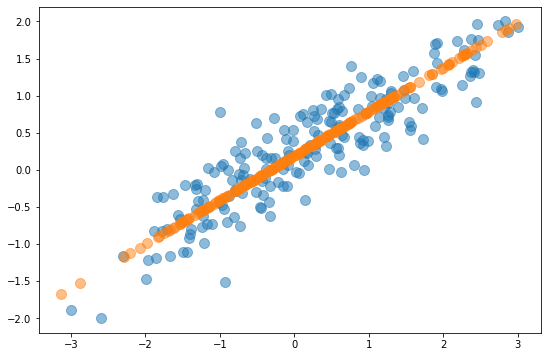

In [17]:
unpca_data = pca.inverse_transform(pca_data)

plt.figure(figsize=(9, 6))
plt.scatter(x, y, s=100, alpha=0.5)
plt.scatter(unpca_data[:, 0], unpca_data[:, 1], s=100, alpha=0.5)

## DIMENSIONALITY REDUCTION with facial images

In [32]:
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_lfw_people

faces = fetch_lfw_people(min_faces_per_person=100)
print(faces.target_names)
print(faces.images.shape)

['Colin Powell' 'Donald Rumsfeld' 'George W Bush' 'Gerhard Schroeder'
 'Tony Blair']
(1140, 62, 47)


Plot the first 24 images in the dataset along with their labels.

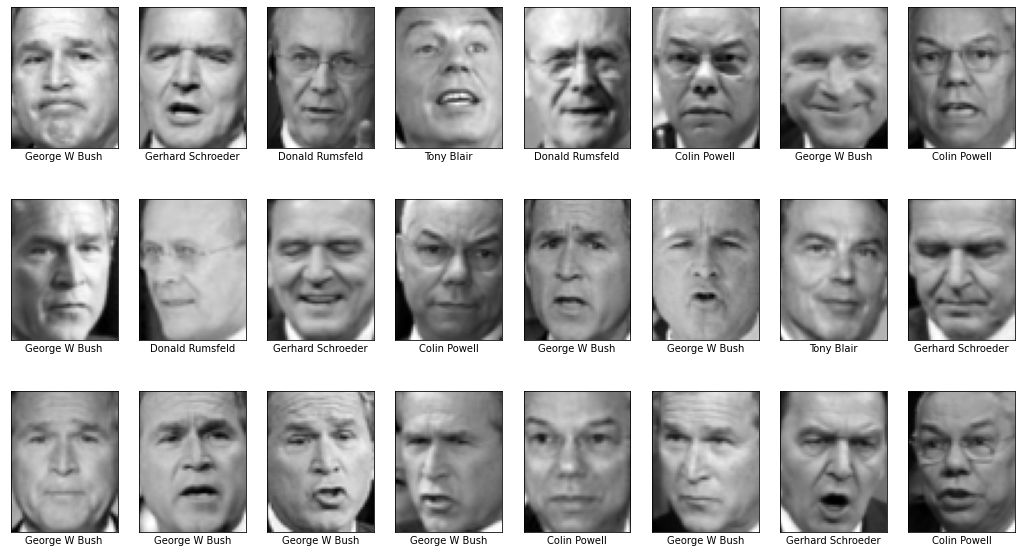

In [33]:
#Plotting the first 24 images in the dataset along with their labels.
fig, ax = plt.subplots(3, 8, figsize=(18, 10))

for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='gist_gray')
    axi.set(xticks=[], yticks=[], xlabel=faces.target_names[faces.target[i]])

Now reduce 2,914 dimensions (62 x 47) to 150 using PCA and invert the transform to restore the facial images.

In [34]:
#Now reduce 2,914 dimensions (62 x 47) to 150 using PCA
pca = PCA(n_components=150, random_state=0)
pca_faces = pca.fit_transform(faces.data)

In [35]:
#Inverting the transform to restore the facial images.
unpca_faces = pca.inverse_transform(pca_faces).reshape(1140, 62, 47)

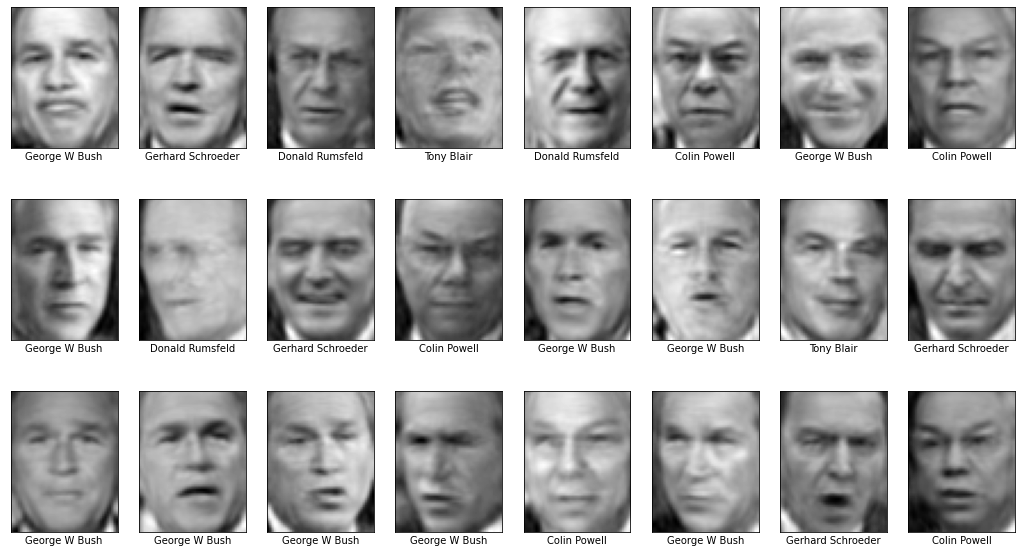

In [36]:
fig, ax = plt.subplots(3, 8, figsize=(18, 10))

for i, axi in enumerate(ax.flat):
    axi.imshow(unpca_faces[i], cmap='gist_gray')
    axi.set(xticks=[], yticks=[], xlabel=faces.target_names[faces.target[i]])

In [11]:
np.sum(pca.explained_variance_ratio_)

0.9480245

Text(0, 0.5, 'Explained Variance')

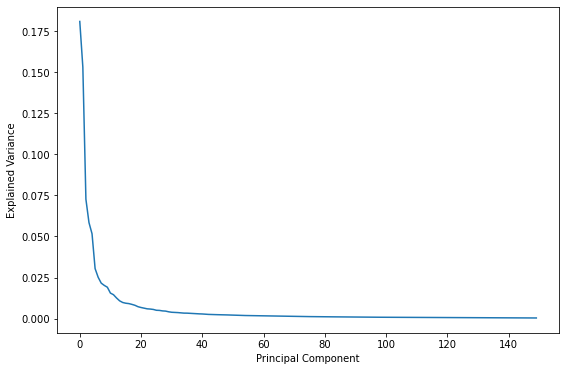

In [37]:
#"Right" number of components?
plt.figure(figsize=(9, 6))
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')